## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import functions as f

importing Jupyter notebook from functions.ipynb


## Read merged data

In [3]:
df = pd.read_parquet('./Processed/WHO-COVID19-MERGED.parquet')

# Data exploration and Visualization

In [4]:
# set the ploting style

plt.style.use('ggplot') # go back and execute the graph again

## Total deaths as a percentage of the total population (Top 10)

In [5]:
df['CumulativeDeathsPopulationRatio'] = df['CumulativeDeaths'] / df['Population']

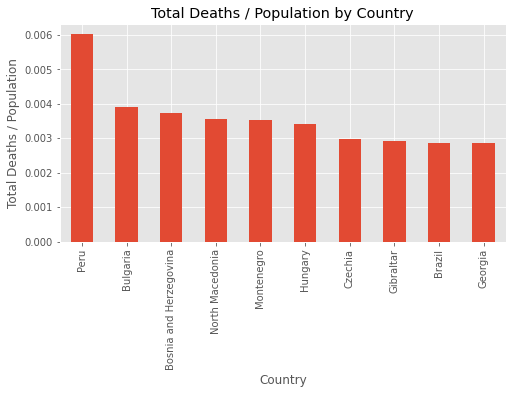

In [7]:
df.groupby('Country')['CumulativeDeathsPopulationRatio'].max().sort_values(ascending=False).head(10).plot(kind='bar', ylabel='Total Deaths / Population', title='Total Deaths / Population by Country', figsize=(8,4), fontsize=10);

# Total deaths per country (Top 10)

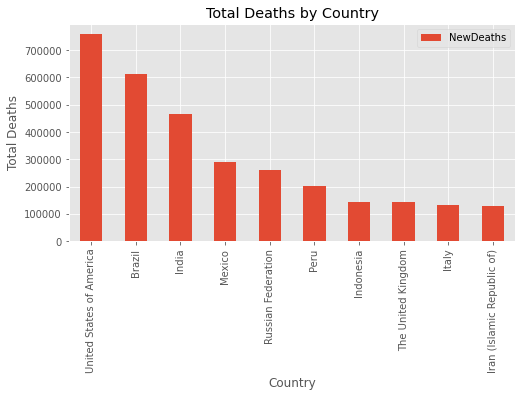

In [8]:
df.groupby('Country').agg({'NewDeaths':'sum'}).sort_values('NewDeaths', ascending=False).head(10).plot(kind='bar', ylabel='Total Deaths', title='Total Deaths by Country', figsize=(8,4), fontsize=10);